In [ ]:
%run "../../../common/0_notebooks_base_setup.py"   

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles para resolver los ejercicios de esta práctica.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [1]:
file_location='../Data/sales_data_sample_excercise.csv'

In [2]:
import numpy as np
datos_crudos=np.genfromtxt(file_location,dtype=str,delimiter='\t',skip_header=1)

## Ejercicio 2

La función `distribution_plotter` grafica los datos que recibe como parámetro en una instancia de numpy array

Graficar los precios de ventas en tres países. ¿Qué pueden decir respecto a sus distribuciones?

Comparar las distribuciones con la de los precios de ventas sin distinguir por paises

In [3]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=500):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

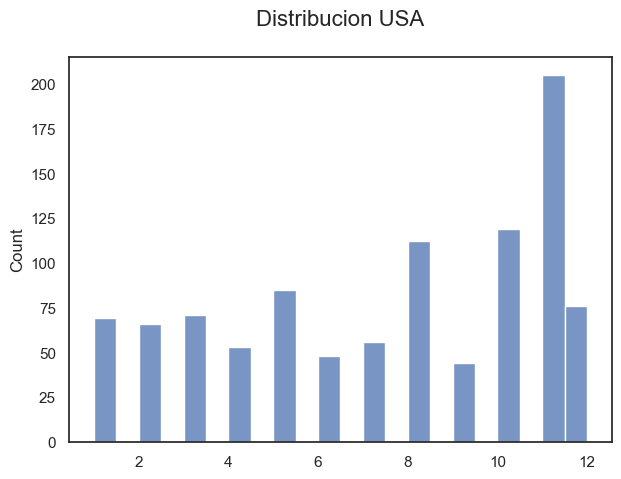

In [15]:
vector_paises=datos_crudos[:,5]
mask_usa=vector_paises=='USA'
mask_fra=vector_paises=='France'
mask_aus=vector_paises=='Australia'

vector_ventas= datos_crudos[:,2]
vector_ventas = vector_ventas.astype(np.float)

ventas_usa = vector_ventas[mask_usa]
ventas_fra = vector_ventas[mask_fra]
ventas_aus = vector_ventas[mask_aus]

distribution_plotter(ventas_usa,"USA",0.5)

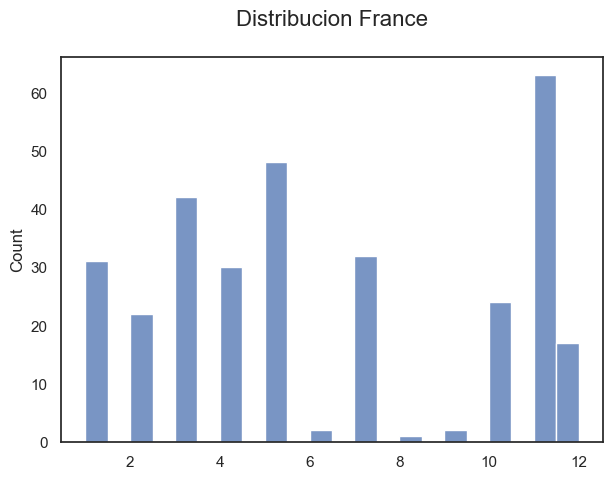

In [16]:
distribution_plotter(ventas_fra,"France",0.5)

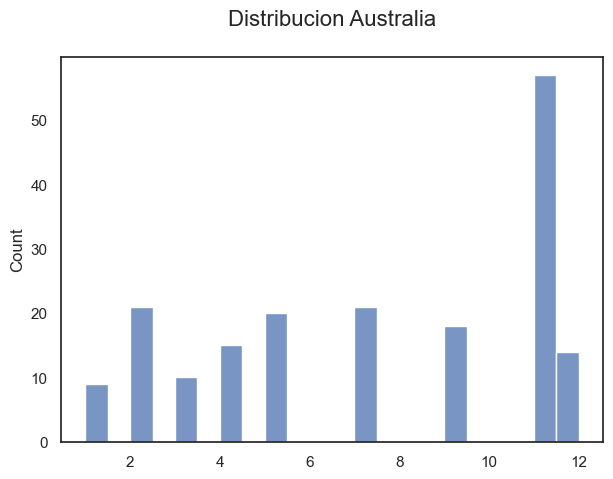

In [17]:
distribution_plotter(ventas_aus,"Australia",0.5)

## Ejercicio 3
Para los tres países del punto anterior, calcular con dos decimales
* Media
* Mediana
* Rango
* Desvío estandard

Repetir para todos los datos de ventas sin distinguir por país.

¿Qué conclusiones pueden sacar respecto a la información que brinda cada una de estas medidas en este caso particular?

In [19]:
print("media", np.mean(ventas_usa))
print("mediana", np.median(ventas_usa))
print("desvio", np.std(ventas_usa))
print("rango", np.max(ventas_usa)-np.min(ventas_usa))

media 7.350597609561753
mediana 8.0
desvio 3.535616960625854
rango 11.0


In [20]:
print("media", np.mean(vector_ventas))
print("mediana", np.median(vector_ventas))
print("desvio", np.std(vector_ventas))
print("rango", np.max(vector_ventas)-np.min(vector_ventas))

media 7.0924548352816155
mediana 8.0
desvio 3.6559856000475017
rango 11.0
